<a href="https://colab.research.google.com/github/laussin86/laussin86/blob/main/Loan_Default_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [583]:
import numpy as np
import pandas as pd
import seaborn as sns
import seaborn as sn
from sklearn.preprocessing import MinMaxScaler
from sklearn import metrics
from xgboost import XGBClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn import preprocessing
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
from sklearn.model_selection import train_test_split
import matplotlib
import matplotlib.pyplot as plt

In [446]:
#1. Check the datatypes of the attributes.
df = pd.read_csv('accepted_2007_to_2018Q4.csv',
                 usecols=['loan_amnt', 'term', 'int_rate', 'installment', 'grade', 'sub_grade',
                          'emp_title', 'emp_length', 'home_ownership', 'annual_inc',
                          'verification_status', 'issue_d', 'loan_status', 'purpose', 'title',"addr_state",
                          'dti', 'earliest_cr_line', 'open_acc', 'pub_rec', 'revol_bal',
                          'revol_util', 'total_acc', 'initial_list_status', 'application_type',
                          'mort_acc', 'pub_rec_bankruptcies'])
print(df.dtypes)

loan_amnt               float64
term                     object
int_rate                float64
installment             float64
grade                    object
sub_grade                object
emp_title                object
emp_length               object
home_ownership           object
annual_inc              float64
verification_status      object
issue_d                  object
loan_status              object
purpose                  object
title                    object
addr_state               object
dti                     float64
earliest_cr_line         object
open_acc                float64
pub_rec                 float64
revol_bal               float64
revol_util              float64
total_acc               float64
initial_list_status      object
application_type         object
mort_acc                float64
pub_rec_bankruptcies    float64
dtype: object


In [447]:
#2. Are there any missing values in the dataset?
df.isnull().sum()

loan_amnt                   29
term                        29
int_rate                    29
installment                 29
grade                       29
sub_grade                   29
emp_title               152730
emp_length              132947
home_ownership              29
annual_inc                  33
verification_status         29
issue_d                     29
loan_status                 29
purpose                     29
title                    23350
addr_state                  29
dti                       1548
earliest_cr_line            58
open_acc                    58
pub_rec                     58
revol_bal                   29
revol_util                1616
total_acc                   58
initial_list_status         29
application_type            29
mort_acc                 50060
pub_rec_bankruptcies      1395
dtype: int64

In [448]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
loan_amnt,2069361.0,15084.387693,9156.593067,500.00,8000.00,13000.00,20000.00,4.000000e+04
int_rate,2069361.0,13.069749,4.808896,5.31,9.49,12.62,15.99,3.099000e+01
installment,2069361.0,446.376073,265.744649,4.93,253.50,379.76,593.46,1.719830e+03
annual_inc,2069357.0,77830.204048,115435.692190,0.00,46000.00,65000.00,93000.00,1.100000e+08
dti,2067842.0,18.794574,14.002164,-1.00,11.89,17.82,24.46,9.990000e+02
open_acc,2069332.0,11.619359,5.626620,0.00,8.00,11.00,14.00,1.010000e+02
pub_rec,2069332.0,0.194832,0.568124,0.00,0.00,0.00,0.00,8.600000e+01
revol_bal,2069361.0,16706.972795,22891.994961,0.00,5991.00,11390.00,20343.00,2.904836e+06
revol_util,2067774.0,50.577988,24.692098,0.00,31.80,50.60,69.60,8.923000e+02
total_acc,2069332.0,24.237403,11.989895,1.00,15.00,22.00,31.00,1.760000e+02


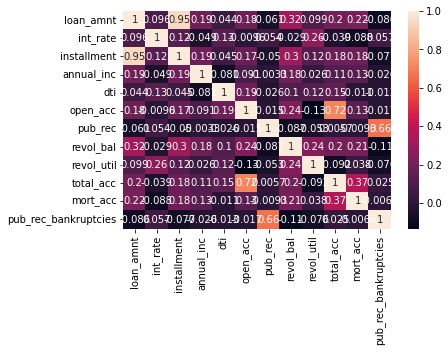

In [449]:
# correlation matrix
corrMatrix = df.corr()
sn.heatmap(corrMatrix, annot=True)
plt.show()

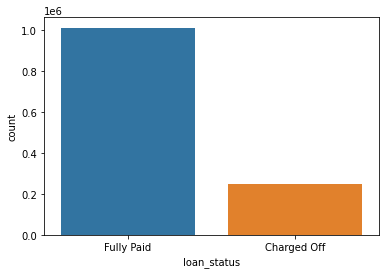

In [450]:
#4. Graph the frequency of loan status with fully paid w/o current and charged off.
df_nocurrent = df[(df['loan_status'] == 'Fully Paid') | (df['loan_status'] == 'Charged Off')]
ax = sns.countplot(x="loan_status",data=df_nocurrent)



In [ ]:
#PREPROCESSING AND EXPLORATORY ANALYSIS

In [451]:
len(df_nocurrent['addr_state'].unique())

51

In [452]:
df_nocurrent['addr_state'].isnull().sum()

0

In [453]:
#create dummies for addr_state
add_state_dum = pd.get_dummies(df_nocurrent['addr_state'], drop_first=True)
df_nocurrent = pd.concat([df_nocurrent.drop('addr_state', axis=1), add_state_dum], axis=1)
add_state_dum

,AL,AR,AZ,CA,CO,CT,DC,DE,FL,GA,HI,IA,ID,IL,IN,KS,KY,LA,MA,MD,ME,MI,MN,MO,MS,MT,NC,ND,NE,NH,NJ,NM,NV,NY,OH,OK,OR,PA,RI,SC,SD,TN,TX,UT,VA,VT,WA,WI,WV,WY
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0
5,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2069382,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2069384,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2069386,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
2069388,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


(array([1.261721e+06, 1.670000e+02, 2.300000e+01, 1.300000e+01,
        1.200000e+01, 8.000000e+00, 9.000000e+00, 7.000000e+00,
        7.000000e+00, 1.000000e+00]),
 array([       0.,  1099920.,  2199840.,  3299760.,  4399680.,  5499600.,
         6599520.,  7699440.,  8799360.,  9899280., 10999200.]),
 <a list of 10 Patch objects>)

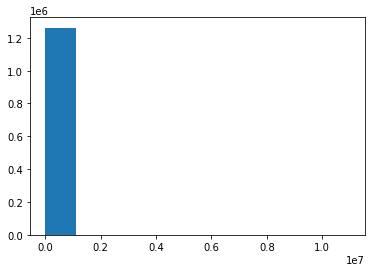

In [454]:
#distribution of annual income
plt.hist(df_nocurrent['annual_inc'])

In [455]:
# salary is highly skewed towards the right so lets find how many people has annual income more than 250,000
len(df_nocurrent[df_nocurrent['annual_inc'] > 250000])

12465

In [456]:
#or in percentage
per=12465*100/len(df_nocurrent) 
per

0.9877429538625385

(array([ 39120., 325702., 397242., 241597., 125354.,  54645.,  32295.,
         15071.,  10637.,   7840.]),
 array([     0.,  25000.,  50000.,  75000., 100000., 125000., 150000.,
        175000., 200000., 225000., 250000.]),
 <a list of 10 Patch objects>)

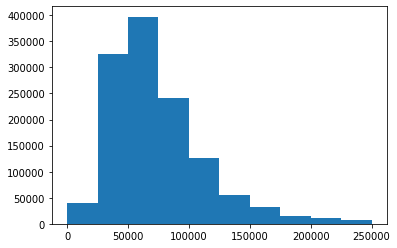

In [457]:
#so 1% so lets drop those outliers and rerun the distribution
df_nocurrent= df_nocurrent[df_nocurrent['annual_inc'] <= 250000]
plt.hist(df_nocurrent['annual_inc'])
#looks better than before

In [458]:
#check if we still have any missing values
df_nocurrent['annual_inc'].isnull().sum()

0

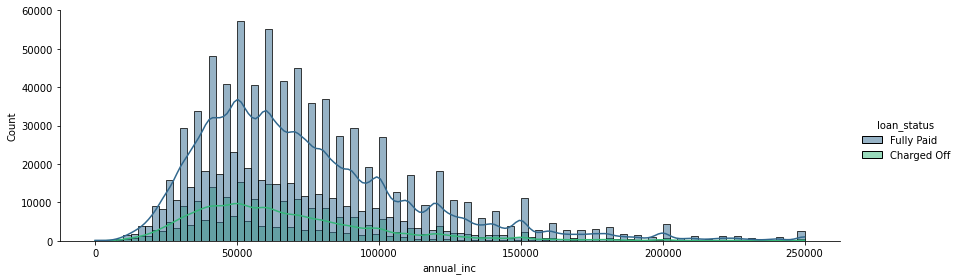

In [459]:
# lets check the annual income of people who paid off their loan vs those charged off.
sns.displot(data=df_nocurrent, x='annual_inc', hue='loan_status', bins=100, height=4, aspect=3, kde=True, palette='viridis');

In [460]:
#let's check the means
df_nocurrent.groupby('loan_status')['annual_inc'].describe()
#the 2 means differ by around $6,000

,count,mean,std,min,25%,50%,75%,max
loan_status,,,,,,,,
Charged Off,247673.0,67869.014921,35948.899445,0.0,43000.0,60000.0,84000.0,250000.0
Fully Paid,1001830.0,73869.467413,38933.096008,0.0,46342.0,65000.0,91000.0,250000.0


In [461]:
df_nocurrent['earliest_cr_line'].head()

0    Aug-2003
1    Dec-1999
2    Aug-2000
4    Jun-1998
5    Oct-1987
Name: earliest_cr_line, dtype: object

In [462]:
#let's keep only the month
df_nocurrent['earliest_cr_line'] = df_nocurrent['earliest_cr_line'].apply( lambda date : int(date[-4:]))

In [463]:
df_nocurrent['earliest_cr_line'].head()

0    2003
1    1999
2    2000
4    1998
5    1987
Name: earliest_cr_line, dtype: int64

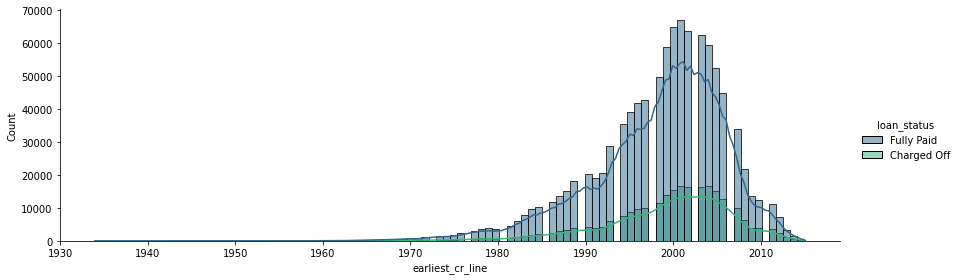

In [464]:
sns.displot(data=df_nocurrent, x='earliest_cr_line', hue='loan_status', bins=100, height=4, aspect=3, kde=True, palette='viridis');

In [465]:
df_nocurrent.groupby('loan_status')['earliest_cr_line'].describe()

,count,mean,std,min,25%,50%,75%,max
loan_status,,,,,,,,
Charged Off,247673.0,1999.287686,7.538622,1944.0,1996.0,2001.0,2004.0,2015.0
Fully Paid,1001830.0,1998.461048,7.579182,1934.0,1995.0,2000.0,2004.0,2015.0


In [ ]:
# we can see that there is one year difference between those  who paid and  those charged off

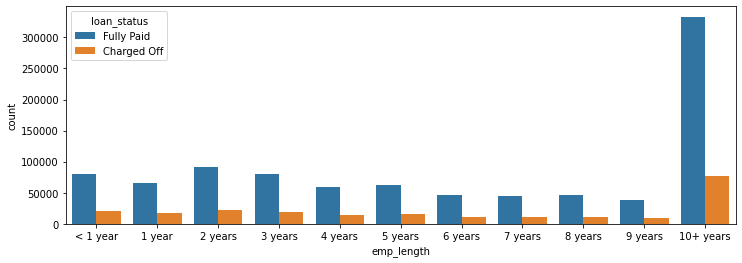

In [466]:
#let's create ascending order for emp_length and check the distribution with fully paid and charged off
emp_length_order = [ '< 1 year', '1 year', '2 years', '3 years', '4 years', '5 years', '6 years', '7 years', '8 years', '9 years', '10+ years']
plt.figure(figsize=(12,4))
ax = sns.countplot(x="emp_length",data=df_nocurrent,order=emp_length_order,hue='loan_status')

In [467]:
#let check % of people charged off by year
emp_charged_off = df_nocurrent[df_nocurrent['loan_status']=="Charged Off"].groupby("emp_length").count()['loan_status']
emp_fully_paid = df_nocurrent[df_nocurrent['loan_status']=="Fully Paid"].groupby("emp_length").count()['loan_status']
per_charged_off = (emp_charged_off * 100)/(emp_charged_off + emp_fully_paid)
per_charged_off

emp_length
1 year       20.403304
10+ years    18.719413
2 years      19.606819
3 years      19.837457
4 years      19.609391
5 years      19.396017
6 years      19.244028
7 years      19.475116
8 years      19.867828
9 years      19.914112
< 1 year     20.208317
Name: loan_status, dtype: float64

In [468]:
# we noticed that the percentage is the same through the year and will not make any difference for 
#our predictions so we drop it
df_nocurrent= df_nocurrent.drop('emp_length', axis=1)

In [469]:
df_nocurrent['emp_title'].describe()

count     1170044
unique     362170
top       Teacher
freq        19808
Name: emp_title, dtype: object

In [470]:
#too many unique value so it is better to drop it
df_nocurrent= df_nocurrent.drop('emp_title', axis=1)

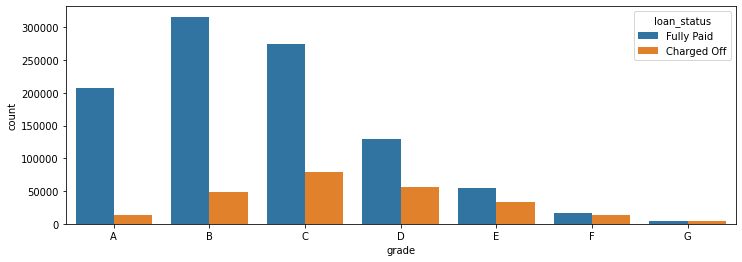

In [471]:
#lets check people grade based on loan status
plt.figure(figsize=(12,4))
ax = sns.countplot(x="grade",data=df_nocurrent,order= sorted(df_nocurrent['grade'].unique()), hue='loan_status')

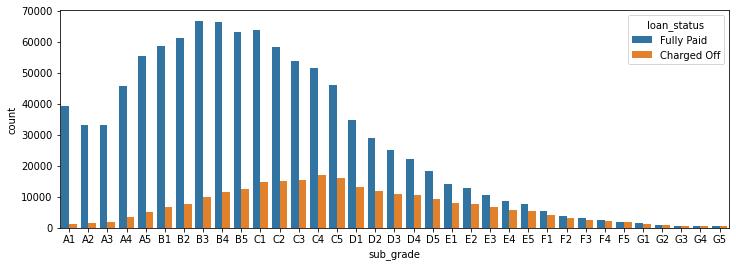

In [472]:
#lets check people sub_grade based on loan status
plt.figure(figsize=(12,4))
ax = sns.countplot(x='sub_grade',data=df_nocurrent,order= sorted(df_nocurrent['sub_grade'].unique()), hue='loan_status')

In [473]:
#information of grade is already on sub grade so let's drop  grade ande create dummies for subgrade
df_nocurrent= df_nocurrent.drop('grade', axis=1)


In [474]:
dummies_sub_grade = pd.get_dummies(df_nocurrent['sub_grade'], drop_first=True)
df_nocurrent = pd.concat([df_nocurrent.drop('sub_grade', axis=1), dummies_sub_grade], axis=1)

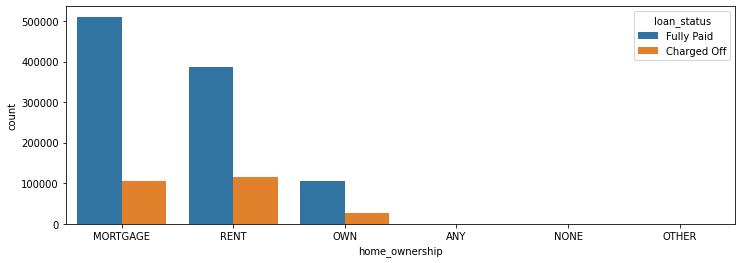

In [475]:
#let's check distribution of home ownership by loan status
plt.figure(figsize=(12,4))
ax = sns.countplot(x="home_ownership",data=df_nocurrent,hue='loan_status')

In [476]:
#since Any,None and other are similar let's put any and none into other
df_nocurrent['home_ownership'] = df_nocurrent['home_ownership'].replace(['NONE', 'ANY'], 'OTHER')

MORTGAGE    615621
RENT        500148
OWN         133316
OTHER          418
Name: home_ownership, dtype: int64

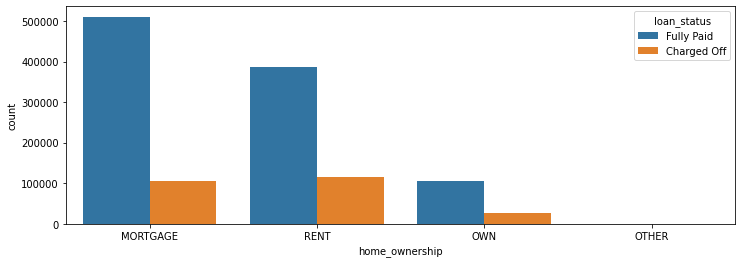

In [478]:
plt.figure(figsize=(12,4))
ax = sns.countplot(x="home_ownership",data=df_nocurrent,hue='loan_status')
df_nocurrent['home_ownership'].value_counts()

In [479]:
# let's check percentage of charged off 
charged_off = df_nocurrent[df_nocurrent['loan_status']=="Charged Off"].groupby("home_ownership").count()['loan_status']
fully_paid = df_nocurrent[df_nocurrent['loan_status']=="Fully Paid"].groupby("home_ownership").count()['loan_status']
perc_charged_off = (charged_off * 100)/(charged_off + fully_paid)
perc_charged_off

home_ownership
MORTGAGE    17.141878
OTHER       18.181818
OWN         20.417654
RENT        22.962803
Name: loan_status, dtype: float64

In [480]:
#visible difference so let's create dummies for the 4 categories and drop the original home ownership
dummies_home_ownership = pd.get_dummies(df_nocurrent['home_ownership'], drop_first=True)
df_nocurrent = pd.concat([df_nocurrent.drop('home_ownership', axis=1), dummies_home_ownership], axis=1)

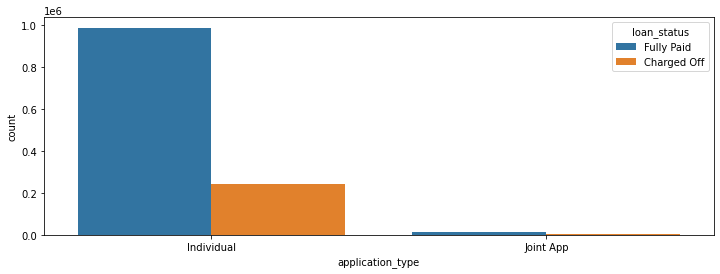

In [481]:
#let's different categories for application types separated by loan_status.
plt.figure(figsize=(12,4))
ax = sns.countplot(x="application_type",data=df_nocurrent,hue='loan_status')


In [482]:
# let's check percentage of charged off 
charged_off = df_nocurrent[df_nocurrent['loan_status']=="Charged Off"].groupby("application_type").count()['loan_status']
fully_paid = df_nocurrent[df_nocurrent['loan_status']=="Fully Paid"].groupby("application_type").count()['loan_status']
perce_charged_off = (charged_off * 100)/(charged_off + fully_paid)
perce_charged_off

application_type
Individual    19.754742
Joint App     23.883763
Name: loan_status, dtype: float64

In [483]:
#visible difference so let's create dummies for the 2 categories and drop the original home ownership
dummies_home_ownership = pd.get_dummies(df_nocurrent['application_type'], drop_first=True)
df_nocurrent = pd.concat([df_nocurrent.drop('application_type', axis=1), dummies_home_ownership], axis=1)

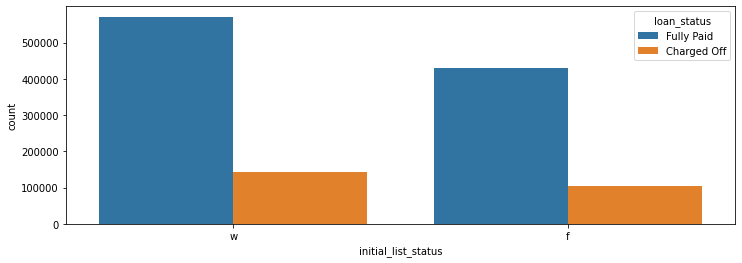

In [484]:
#let's different categories for initial list status types separated by loan_status.
plt.figure(figsize=(12,4))
ax = sns.countplot(x="initial_list_status",data=df_nocurrent,hue='loan_status')

In [485]:
charged_off = df_nocurrent[df_nocurrent['loan_status']=="Charged Off"].groupby("initial_list_status").count()['loan_status']
fully_paid = df_nocurrent[df_nocurrent['loan_status']=="Fully Paid"].groupby("initial_list_status").count()['loan_status']
percen_charged_off = (charged_off * 100)/(charged_off + fully_paid)
percen_charged_off

initial_list_status
f    19.449666
w    20.099961
Name: loan_status, dtype: float64

In [486]:
#no big difference so we can drop it
df_nocurrent= df_nocurrent.drop('initial_list_status', axis=1)

In [487]:
df_nocurrent.groupby('loan_status')['int_rate'].describe()
#clear difference between mean  charged off and fully paid so we keep it.

,count,mean,std,min,25%,50%,75%,max
loan_status,,,,,,,,
Charged Off,247673.0,15.666737,4.844852,5.31,12.29,15.05,18.54,30.99
Fully Paid,1001830.0,12.600044,4.491704,5.31,9.17,12.29,15.31,30.99


In [488]:
df_nocurrent.groupby('loan_status')['loan_amnt'].describe()
#clear difference between mean  charged off and fully paid so we keep it.

,count,mean,std,min,25%,50%,75%,max
loan_status,,,,,,,,
Charged Off,247673.0,15496.821717,8709.246896,900.0,9000.0,14275.0,20125.0,40000.0
Fully Paid,1001830.0,14038.054885,8538.319962,500.0,7500.0,12000.0,20000.0,40000.0


In [489]:
#check missing value
df_nocurrent['mort_acc'].isnull().sum()

46929

In [490]:
df_nocurrent['mort_acc'].describe()
#majority of people have between 1 and 3 account and mean is 1.67 so i will fill missing value with 2

count    1.202574e+06
mean     1.663341e+00
std      1.994149e+00
min      0.000000e+00
25%      0.000000e+00
50%      1.000000e+00
75%      3.000000e+00
max      5.100000e+01
Name: mort_acc, dtype: float64

In [491]:
df_nocurrent['mort_acc'] = df_nocurrent['mort_acc'].fillna(2)

In [492]:
df_nocurrent['mort_acc'].isnull().sum()

0

In [493]:
df_nocurrent.groupby('loan_status')['mort_acc'].describe()

,count,mean,std,min,25%,50%,75%,max
loan_status,,,,,,,,
Charged Off,247673.0,1.390911,1.803889,0.0,0.0,1.0,2.0,29.0
Fully Paid,1001830.0,1.746462,1.987223,0.0,0.0,1.0,3.0,51.0


In [494]:
#we notice some outliers so let drop people  with mort_acc > 10.
df_nocurrent = df_nocurrent[df_nocurrent['mort_acc'] < 11]

In [495]:
df_nocurrent.groupby('loan_status')['mort_acc'].describe()

,count,mean,std,min,25%,50%,75%,max
loan_status,,,,,,,,
Charged Off,247351.0,1.376121,1.755039,0.0,0.0,1.0,2.0,10.0
Fully Paid,999592.0,1.721580,1.912802,0.0,0.0,1.0,3.0,10.0


In [496]:
#check missing value
df_nocurrent['total_acc'].isnull().sum()

0

In [497]:
df_nocurrent['total_acc'].describe()
#majority of people have between 23 and 32 account and mean is 24.9 so i will fill missing value with 25

count    1.246943e+06
mean     2.492566e+01
std      1.192878e+01
min      2.000000e+00
25%      1.600000e+01
50%      2.300000e+01
75%      3.200000e+01
max      1.760000e+02
Name: total_acc, dtype: float64

In [498]:
df_nocurrent['total_acc'] = df_nocurrent['total_acc'].fillna(25)

In [499]:
df_nocurrent['total_acc'].isnull().sum()

0

In [500]:
df_nocurrent.groupby('loan_status')['total_acc'].describe()

,count,mean,std,min,25%,50%,75%,max
loan_status,,,,,,,,
Charged Off,247351.0,24.744861,12.082966,2.0,16.0,23.0,31.0,176.0
Fully Paid,999592.0,24.970403,11.889902,2.0,16.0,23.0,32.0,162.0


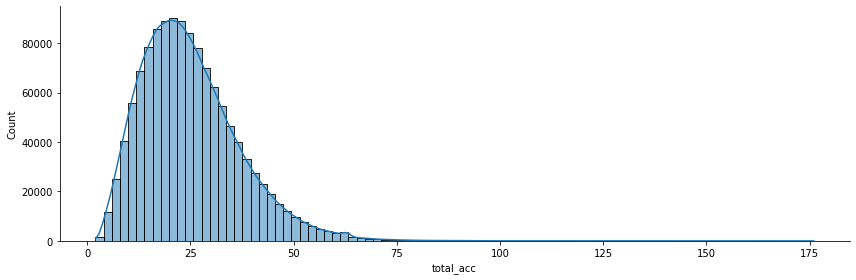

In [501]:
sns.displot(data=df_nocurrent, x='total_acc', bins=88, height=4, aspect=3, kde=True, palette='viridis');

In [502]:
#we notice some outliers so let drop people  with total_acc > 63.
df_nocurrent = df_nocurrent[df_nocurrent['total_acc'] < 64]

In [503]:
df_nocurrent.groupby('loan_status')['total_acc'].describe()

,count,mean,std,min,25%,50%,75%,max
loan_status,,,,,,,,
Charged Off,245717.0,24.424195,11.430837,2.0,16.0,23.0,31.0,63.0
Fully Paid,993871.0,24.696947,11.339051,2.0,16.0,23.0,32.0,63.0


In [504]:
# pretty similar so drop total account
df_nocurrent = df_nocurrent.drop('total_acc', axis=1)

In [505]:
df_nocurrent['open_acc'].isnull().sum()

0

In [506]:
df_nocurrent['open_acc'].describe()
#majority of people have between 11 and 14 account and mean is 11.7 so i will fill missing value with 13

count    1.239588e+06
mean     1.147718e+01
std      5.271083e+00
min      0.000000e+00
25%      8.000000e+00
50%      1.100000e+01
75%      1.400000e+01
max      5.800000e+01
Name: open_acc, dtype: float64

In [507]:
df_nocurrent['open_acc'] = df_nocurrent['open_acc'].fillna(13)

In [508]:
df_nocurrent.groupby('loan_status')['open_acc'].describe()

,count,mean,std,min,25%,50%,75%,max
loan_status,,,,,,,,
Charged Off,245717.0,11.807710,5.439806,0.0,8.0,11.0,15.0,52.0
Fully Paid,993871.0,11.395458,5.225309,0.0,8.0,10.0,14.0,58.0


In [ ]:
#difference so we keep open account 

In [509]:
df_nocurrent['pub_rec'].isnull().sum()

0

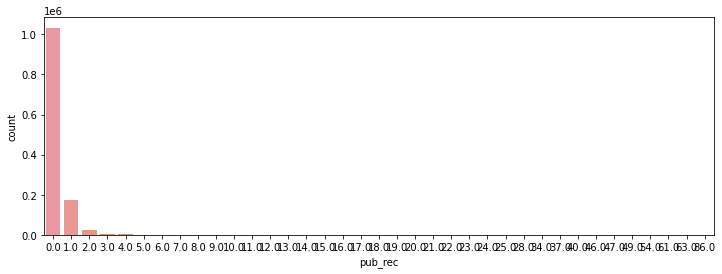

In [510]:
# distribution for public records
plt.figure(figsize=(12,4))
ax = sns.countplot(x="pub_rec",data=df_nocurrent)

In [511]:
# we can notice that there is some outliers and majority of values are from 2 and below so we will
# drop value more than 2
df_nocurrent= df_nocurrent[df_nocurrent['pub_rec'] < 3]

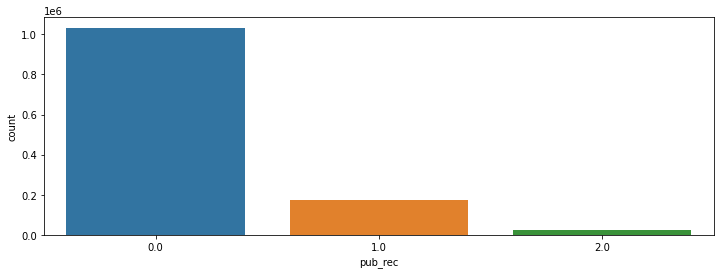

In [512]:
plt.figure(figsize=(12,4))
ax = sns.countplot(x="pub_rec",data=df_nocurrent)

In [513]:
df_nocurrent.groupby('loan_status')['pub_rec'].describe()

,count,mean,std,min,25%,50%,75%,max
loan_status,,,,,,,,
Charged Off,243078.0,0.203141,0.452748,0.0,0.0,0.0,0.0,2.0
Fully Paid,985018.0,0.171202,0.419883,0.0,0.0,0.0,0.0,2.0


In [ ]:
# difference between mean so keeping public records.

In [514]:
df_nocurrent['pub_rec_bankruptcies'].isnull().sum()

689

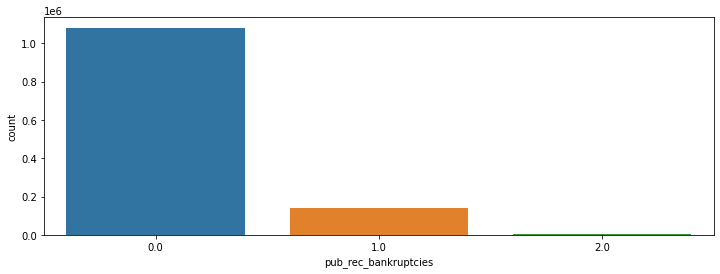

In [515]:
plt.figure(figsize=(12,4))
ax = sns.countplot(x="pub_rec_bankruptcies",data=df_nocurrent)

In [516]:
df_nocurrent.groupby('loan_status')['pub_rec_bankruptcies'].describe()

,count,mean,std,min,25%,50%,75%,max
loan_status,,,,,,,,
Charged Off,242961.0,0.142179,0.367216,0.0,0.0,0.0,0.0,2.0
Fully Paid,984446.0,0.120513,0.339877,0.0,0.0,0.0,0.0,2.0


In [ ]:
#public record and Public record bankrupcies are highly corroleted so we can drop Public record bankrupcies
df_nocurrent= df_nocurrent.drop('pub_rec_bankruptcies', axis=1)

In [519]:
# check missing values
df_nocurrent['purpose'].isnull().sum()

0

In [520]:
#check unique values
df_nocurrent['purpose'].describe()

count                1228096
unique                    14
top       debt_consolidation
freq                  714303
Name: purpose, dtype: object

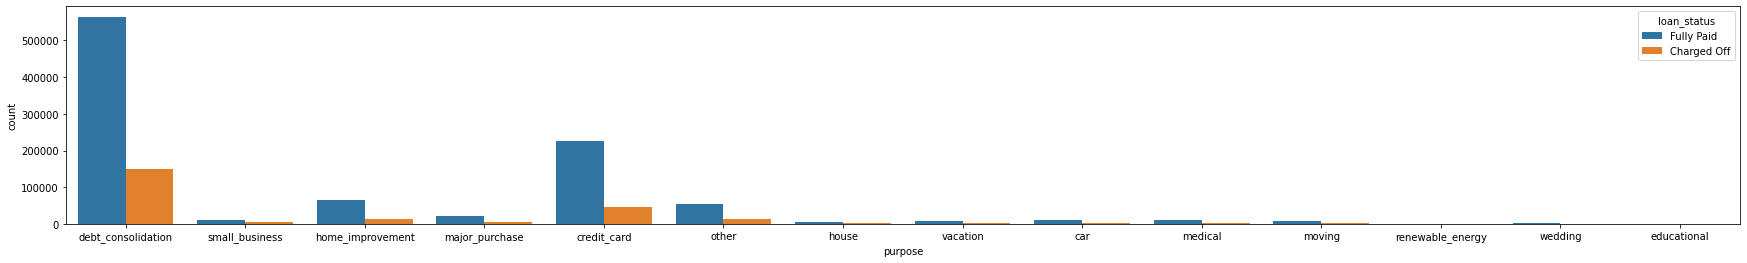

In [521]:
plt.figure(figsize=(30,4))
ax = sns.countplot(x="purpose",data=df_nocurrent,hue='loan_status')

In [522]:
charged_off = df_nocurrent[df_nocurrent['loan_status']=="Charged Off"].groupby("purpose").count()['loan_status']
fully_paid = df_nocurrent[df_nocurrent['loan_status']=="Fully Paid"].groupby("purpose").count()['loan_status']
percent_charged_off = (charged_off * 100)/(charged_off + fully_paid)
percent_charged_off

purpose
car                   14.439865
credit_card           16.737332
debt_consolidation    20.989692
educational           17.283951
home_improvement      17.590622
house                 21.870073
major_purchase        18.193456
medical               21.664988
moving                23.349193
other                 20.989077
renewable_energy      22.956731
small_business        29.376768
vacation              19.015796
wedding               12.202643
Name: loan_status, dtype: float64

In [523]:
#clear difference between values so keep it.
dummies_purpose = pd.get_dummies(df_nocurrent['purpose'], drop_first=True)
df_nocurrent = pd.concat([df_nocurrent.drop('purpose', axis=1), dummies_purpose], axis=1)

In [524]:
# check missing values
df_nocurrent['term'].isnull().sum()

0

In [525]:
#check unique values
df_nocurrent['term'].describe()

count        1228096
unique             2
top        36 months
freq          930730
Name: term, dtype: object

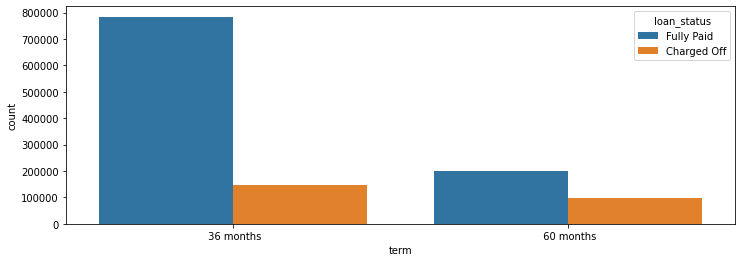

In [526]:
plt.figure(figsize=(12,4))
ax = sns.countplot(x="term",data=df_nocurrent,hue='loan_status')

In [527]:
charged_off = df_nocurrent[df_nocurrent['loan_status']=="Charged Off"].groupby("term").count()['loan_status']
fully_paid = df_nocurrent[df_nocurrent['loan_status']=="Fully Paid"].groupby("term").count()['loan_status']
percenta_charged_off = (charged_off * 100)/(charged_off + fully_paid)
percenta_charged_off

term
 36 months    15.723464
 60 months    32.530619
Name: loan_status, dtype: float64

In [528]:
#clear difference between values so keep it.
dummies_term = pd.get_dummies(df_nocurrent['term'], drop_first=True)
df_nocurrent = pd.concat([df_nocurrent.drop('term', axis=1), dummies_term], axis=1)

In [529]:
#check unique values
df_nocurrent['title'].describe()

count                1211890
unique                 61136
top       Debt consolidation
freq                  596246
Name: title, dtype: object

In [530]:
#too many unique values so dropping it
df_nocurrent = df_nocurrent.drop('title', axis=1)

In [531]:
# check missing values
df_nocurrent['revol_bal'].isnull().sum()

0

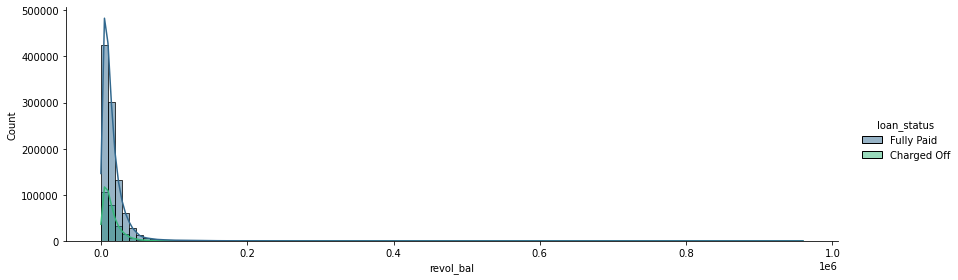

In [532]:
#check distribution based on loan status
sns.displot(data=df_nocurrent, x='revol_bal', hue='loan_status', bins=100, height=4, aspect=3, kde=True, palette='viridis');

In [533]:
#let check percentage rows after 100,000
len(df_nocurrent[df_nocurrent['revol_bal'] > 100000]) * 100 / len(df_nocurrent)

0.7286889624263901

In [534]:
#So less than 1% so drop values more than 100,000
df_nocurrent= df_nocurrent[df_nocurrent['revol_bal'] < 100001]

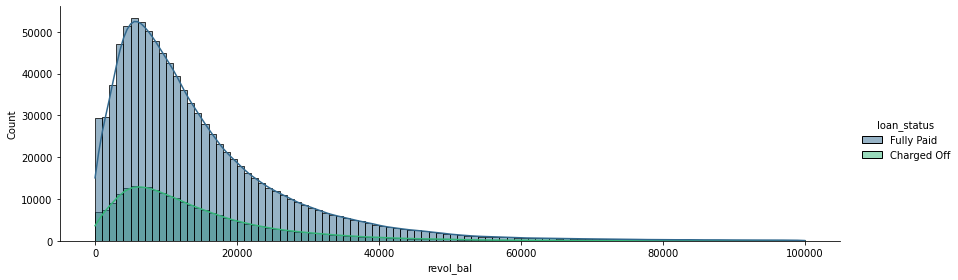

In [535]:
sns.displot(data=df_nocurrent, x='revol_bal', hue='loan_status', bins=100, height=4, aspect=3, kde=True, palette='viridis');
# still some outliers but it is better.

In [536]:
df_nocurrent.groupby('loan_status')['revol_bal'].describe()

,count,mean,std,min,25%,50%,75%,max
loan_status,,,,,,,,
Charged Off,241845.0,14404.764895,12476.796911,0.0,6006.0,11041.0,18897.0,99991.0
Fully Paid,977302.0,14843.231281,13280.701957,0.0,5930.0,11068.0,19497.0,99992.0


In [369]:
# there is a difference between means so keep it.

In [537]:
# check missing values
df_nocurrent['revol_util'].isnull().sum()

710

In [538]:
df_nocurrent['revol_util'].describe()
#fill missing value with the  mean 52.17249

count    1.218437e+06
mean     5.217249e+01
std      2.440958e+01
min      0.000000e+00
25%      3.400000e+01
50%      5.260000e+01
75%      7.100000e+01
max      8.923000e+02
Name: revol_util, dtype: float64

In [540]:
df_nocurrent['revol_util'] = df_nocurrent['revol_util'].fillna(52.17249)

In [541]:
df_nocurrent['revol_util'].isnull().sum()

0

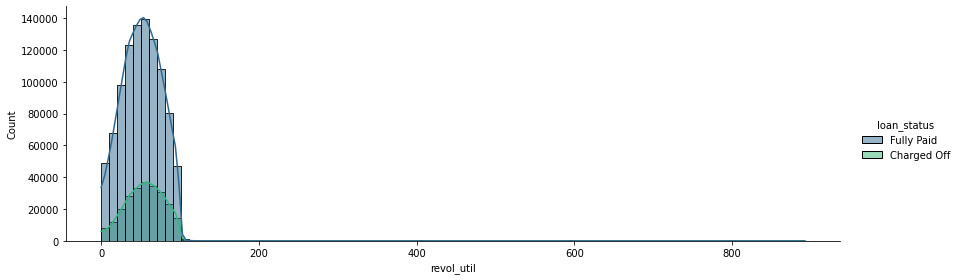

In [542]:
sns.displot(data=df_nocurrent, x='revol_util', hue='loan_status', bins=88, height=4, aspect=3, kde=True, palette='viridis');

In [543]:
#let check percentage rows after 100
len(df_nocurrent[df_nocurrent['revol_util'] > 100]) * 100 / len(df_nocurrent)

0.3514752527791973

In [544]:
# There is some outliers so let's remove all alues more than 100
df_nocurrent= df_nocurrent[df_nocurrent['revol_util'] <101]

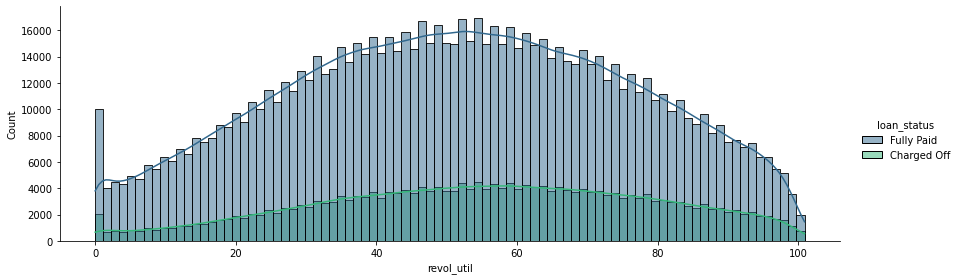

In [545]:
sns.displot(data=df_nocurrent, x='revol_util', hue='loan_status', bins=88, height=4, aspect=3, kde=True, palette='viridis');

In [546]:
df_nocurrent.groupby('loan_status')['revol_util'].describe()

,count,mean,std,min,25%,50%,75%,max
loan_status,,,,,,,,
Charged Off,241135.0,54.996233,23.624348,0.0,37.9,55.9,73.2,100.9
Fully Paid,975415.0,51.332818,24.397580,0.0,33.0,51.7,70.2,100.9


In [ ]:
# difference in mean so keep it.

In [547]:
# check missing values
df_nocurrent['verification_status'].isnull().sum()

0

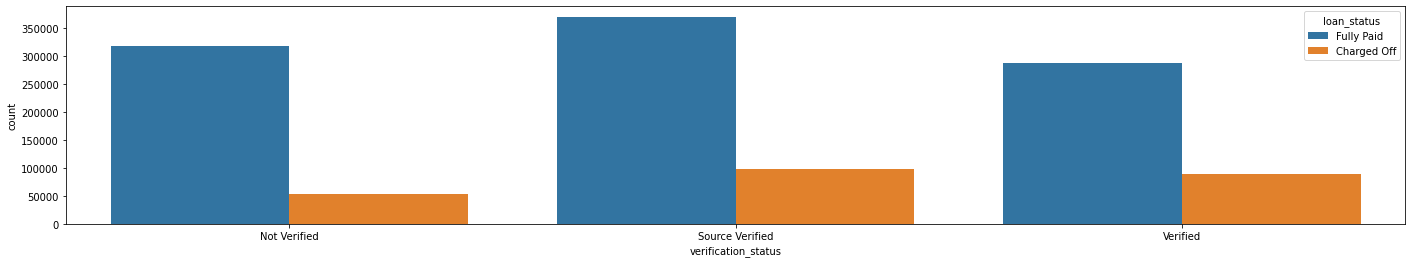

In [548]:
plt.figure(figsize=(24,4))
ax = sns.countplot(x="verification_status",data=df_nocurrent,hue='loan_status')

In [549]:
charged_off = df_nocurrent[df_nocurrent['loan_status']=="Charged Off"].groupby("verification_status").count()['loan_status']
fully_paid = df_nocurrent[df_nocurrent['loan_status']=="Fully Paid"].groupby("verification_status").count()['loan_status']
per_V_charged_off = (charged_off * 100)/(charged_off + fully_paid)
per_V_charged_off

verification_status
Not Verified       14.482646
Source Verified    20.941730
Verified           23.701683
Name: loan_status, dtype: float64

In [550]:
# difference between mean so we keep it.
dummies_verification = pd.get_dummies(df_nocurrent['verification_status'], drop_first=True)
df_nocurrent = pd.concat([df_nocurrent.drop('verification_status', axis=1), dummies_verification], axis=1)

In [551]:
df_nocurrent['issue_d'].head()

0    Dec-2015
1    Dec-2015
2    Dec-2015
4    Dec-2015
5    Dec-2015
Name: issue_d, dtype: object

In [552]:
#let's keep only the month
df_nocurrent['issue_d'] = df_nocurrent['issue_d'].apply( lambda date : int(date[-4:]))

In [553]:
df_nocurrent['issue_d'].head()

0    2015
1    2015
2    2015
4    2015
5    2015
Name: issue_d, dtype: int64

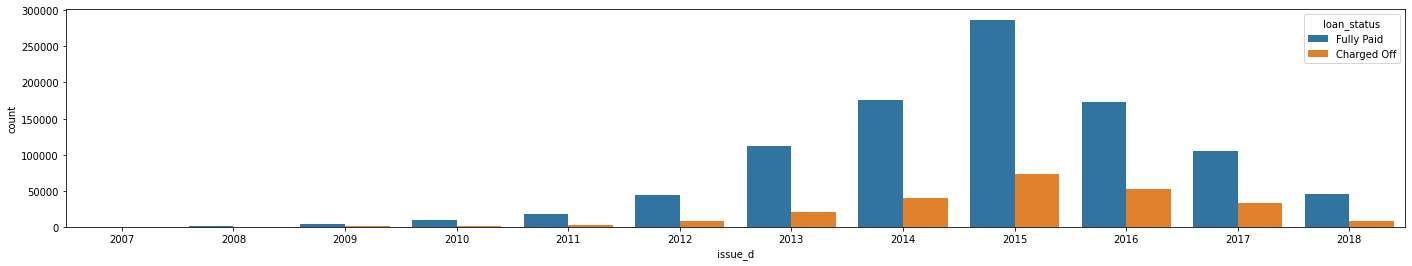

In [554]:
#distribution for issue date based loan status
plt.figure(figsize=(24,4))
ax = sns.countplot(x="issue_d",data=df_nocurrent,hue='loan_status')

In [555]:
df_nocurrent.groupby('loan_status')['issue_d'].describe()

,count,mean,std,min,25%,50%,75%,max
loan_status,,,,,,,,
Charged Off,241135.0,2015.041956,1.556424,2007.0,2014.0,2015.0,2016.0,2018.0
Fully Paid,975415.0,2014.828315,1.681026,2007.0,2014.0,2015.0,2016.0,2018.0


In [556]:
#mean are almost the same so we will drop Issue date
df_nocurrent = df_nocurrent.drop('issue_d', axis=1)

In [557]:
# check missing values
df_nocurrent['dti'].isnull().sum()

304

In [558]:
df_nocurrent['dti'].describe()

count    1.216246e+06
mean     1.830250e+01
std      1.086820e+01
min     -1.000000e+00
25%      1.187000e+01
50%      1.765000e+01
75%      2.405000e+01
max      9.990000e+02
Name: dti, dtype: float64

In [559]:
#fill missing value with the  mean 18.3025
df_nocurrent['dti'] = df_nocurrent['dti'].fillna(18.3025)

In [560]:
df_nocurrent['dti'].isnull().sum()

0

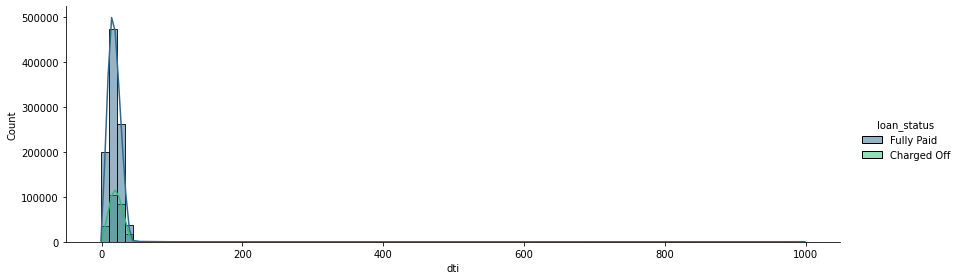

In [561]:
sns.displot(data=df_nocurrent, x='dti', hue='loan_status', bins=88, height=4, aspect=3, kde=True, palette='viridis');

In [562]:
#there is some outliers so let remove values more than 40.
len(df_nocurrent[df_nocurrent['dti'] > 40]) * 100 / len(df_nocurrent)

0.45908511775101724

In [563]:
df_nocurrent= df_nocurrent[df_nocurrent['dti'] <41]

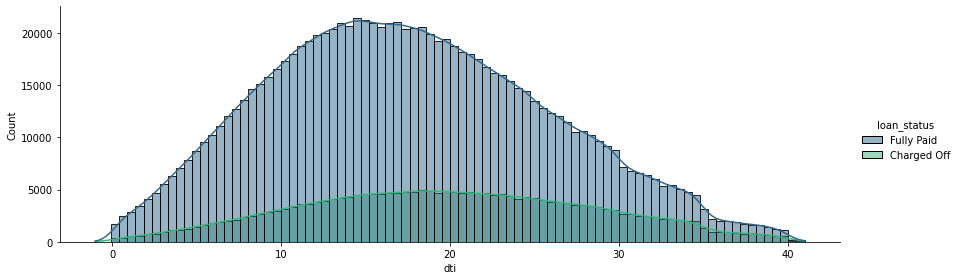

In [564]:
sns.displot(data=df_nocurrent, x='dti', hue='loan_status', bins=88, height=4, aspect=3, kde=True, palette='viridis');

In [565]:
df_nocurrent.groupby('loan_status')['dti'].describe()

,count,mean,std,min,25%,50%,75%,max
loan_status,,,,,,,,
Charged Off,239603.0,19.898254,8.529591,0.0,13.59,19.71,26.17,40.99
Fully Paid,971844.0,17.638215,8.223446,-1.0,11.48,17.11,23.36,40.99


In [ ]:
#there is differences between means so we keep it.

In [566]:
# I have done all features so let's dummy the predict feature loan status.
df_nocurrent['loan_status'] = df_nocurrent['loan_status'].map({'Fully Paid':1,'Charged Off':0})

In [567]:
df_nocurrent.dtypes.value_counts()

uint8      104
float64     10
int64        2
dtype: int64

In [ ]:
#SCALING AND TRAIN TEST SPLITING

In [568]:
# lets first check the final dimension of our dataset after the preprocessing step
df_nocurrent.shape

(1211447, 116)

In [569]:
# let's now split our dataset

In [570]:
X = df_nocurrent.drop('loan_status', axis=1)

In [571]:
y = df_nocurrent['loan_status']

In [572]:
# keeping 30% for the test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

In [573]:
# let's scale our train and test.
scaler = MinMaxScaler()

In [574]:
X_train = scaler.fit_transform(X_train)

In [575]:
X_test = scaler.transform(X_test)

In [576]:
#XGBoost
#let's first fit the model to the train data
model = XGBClassifier()
model.fit(X_train, y_train)

XGBClassifier()

In [578]:
# now let's create the prediciton
preds = model.predict(X_test) 

In [582]:
# The confusion Matrix
confusion_matrix(y_test,preds)

array([[  3718,  68303],
       [  2792, 288622]])

In [579]:
#let's see now the metrics based on XGBoost
print(classification_report(y_test,preds))

              precision    recall  f1-score   support

           0       0.57      0.05      0.09     72021
           1       0.81      0.99      0.89    291414

    accuracy                           0.80    363435
   macro avg       0.69      0.52      0.49    363435
weighted avg       0.76      0.80      0.73    363435



In [584]:
# Ramdom Forest
rf = RandomForestClassifier(n_estimators=100)

In [585]:
rf.fit(X_train,y_train)

RandomForestClassifier()

In [586]:
pred = rf.predict(X_test)

In [587]:
confusion_matrix(y_test,pred)

array([[  5713,  66308],
       [  4941, 286473]])

In [588]:
#let's see now the metrics based on Random Forest
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

           0       0.54      0.08      0.14     72021
           1       0.81      0.98      0.89    291414

    accuracy                           0.80    363435
   macro avg       0.67      0.53      0.51    363435
weighted avg       0.76      0.80      0.74    363435

